In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs

In [2]:
seed = 42
np.random.seed(seed)

### Overlapping classes.

In [3]:
# Number of examples.
N = 1000

centers = [[1, 1], [-1, -1]]
X, y = make_blobs(n_samples=N, centers=centers, n_features=2, random_state=seed)

### Classes

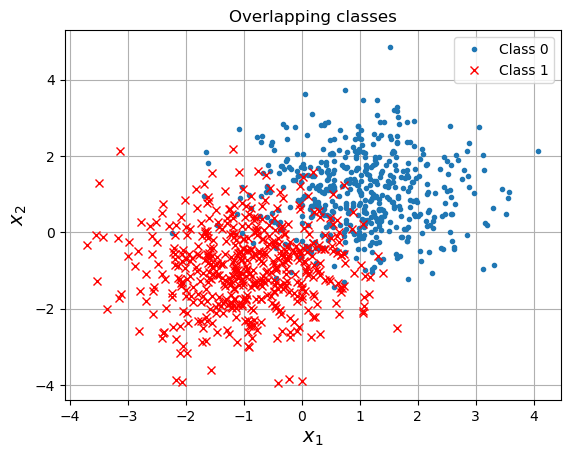

In [4]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Overlapping classes')
plt.legend()
plt.grid()
#plt.savefig('noisy_and_gate.png', dpi=600)
plt.show()

### Perceptron

In [5]:
# Instantiate.
per = Perceptron(random_state=seed)

# Train.
per.fit(X, y)

print('Iterations:', per.n_iter_)

# Predict.
y_pred = per.predict(X)

# Calculate accuracy.
acc = accuracy_score(y_pred, y)
print('Accuracy:', acc)

Iterations: 8
Accuracy: 0.821


### Decision regions.

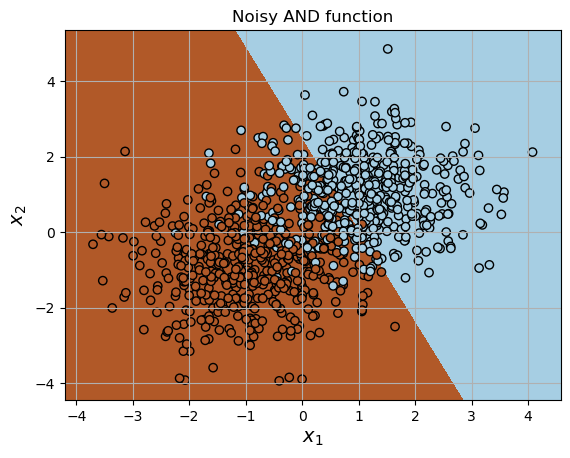

In [6]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = per.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()

plt.title('Noisy AND function')
#plt.savefig('noisy_and_gate_boundary.png', dpi=600)
plt.show()

### Confusion matrix.

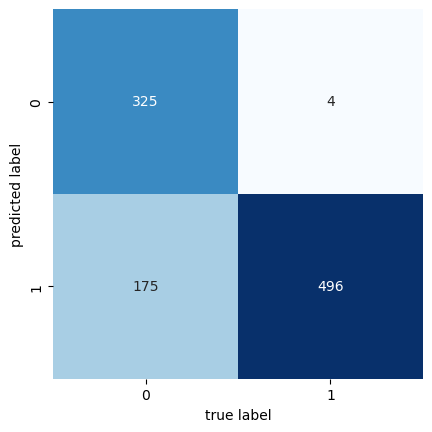

In [7]:
# Plot the confusion matrix
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Metrics.

In [8]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.65      0.78       500
           1       0.74      0.99      0.85       500

    accuracy                           0.82      1000
   macro avg       0.86      0.82      0.82      1000
weighted avg       0.86      0.82      0.82      1000

